<h1>Machine learning - HW3</h1>
<h1>Navid Ashraf</h1>
<h2>libraries:</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

<h2>Question 1</h2>
<p>we want to build a perceptron classifier model for a given dataset (X,t). The initial weights are set as: $W^{t} = [-2 \ \ +2 \ \ +1]$ and learning rate is 0.1. Our objective is to calculate the perceptron weights using the batch learning method.</p>
<p>plot the data, the initial classifier borderline and the final classifier borderline on a 2D Plane.</p>
$$X:
\begin{vmatrix}
0 & 0\\
1 & 1\\
2 & 0\\
3 & 1
\end{vmatrix} \
,t:
\begin{vmatrix}
-1\\
-1\\
+1\\
+1
\end{vmatrix}$$

<h2>Answer:</h2>
inputs:

In [2]:
X = np.array([[0, 0],
     [1, 1],
     [2, 0],
     [3, 1]])
x1 = [[0, 1],
     [0, 1]]
x2 = [[2, 3],
     [0, 1]]
t = [-1,
     -1,
     1,
     1]
alpha = 0.1
w = [-2, 2, 1]

model:

In [3]:
class batchPerceptron:
    def __init__(self, learning_rate, num_epochs, weights, bias):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = weights
        self.bias = bias

    def train(self, X, y):
        num_samples, num_features = X.shape

        for _ in range(self.num_epochs):
            activation = np.dot(X, self.weights) + self.bias
            y_pred = np.where(activation >= 0, 1, -1)
            
            weight_update = self.learning_rate * np.dot(X.T, (y - y_pred)) / num_samples
            bias_update = self.learning_rate * np.sum(y - y_pred) / num_samples
            
            self.weights += weight_update
            self.bias += bias_update

    def predict(self, X):
        activation = np.dot(X, self.weights) + self.bias
        y_pred = np.where(activation >= 0, 1, -1)
        return y_pred


train:

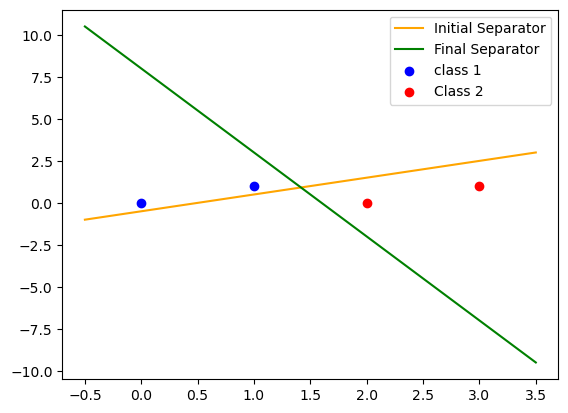

In [4]:
perceptron = batchPerceptron(0.1, 100, w[0:2], w[2])
perceptron.train(X, t)

final_w = perceptron.weights
final_w = np.append(final_w, perceptron.bias)

x_line = np.linspace(-0.5, 3.5)
final_y = (-final_w[0] * x_line - final_w[2]) / final_w[1]
init_y = (-w[0] * x_line - w[2]) / w[1]

plt.plot(x_line, init_y, color='orange', label='Initial Separator')
plt.plot(x_line, final_y, color='green', label='Final Separator')
plt.scatter(x1[0],x1[1],color='blue', label='class 1')
plt.scatter(x2[0],x2[1],color='red', label='Class 2')
plt.legend()
plt.show()

<h2>Question 2</h2>
<p>Using the perceptron algorithm, please train a linear classifier model based on the provided training dataset. Use an online learning method. The initial weights for the classifier are set as: w = [2, -1, 1], and the learning rate is 0.1. </p>
<p>Next, utilize provided dataset consisting of 4 samples to evaluate the performance of the trained model. Proceed with the calculation and update of weights, and complete the table below until a full epoch without error is reached.</p>
$$
X_{train}:
\begin{vmatrix}
0 & 0\\
1 & 0\\
0 & 1\\
1 & 1
\end{vmatrix} \ \
t_{train}:
\begin{vmatrix}
-1\\
-1\\
-1\\
1
\end{vmatrix}
\\
X_{test}:
\begin{vmatrix}
-0.5 & -0.5\\
0 & 0.5\\
0.5 & 0\\
1.5 & 1.5
\end{vmatrix} \ \
t_{train}:
\begin{vmatrix}
-1\\
-1\\
-1\\
1
\end{vmatrix}$$

<table>
<thead>
<tr>
<th>epoch</th>
<th>x1</th>
<th>x2</th>
<th>t</th>
<th>w0</th>
<th>w1</th>
<th>w2</th>
<th>y</th>
<th>e</th>
<th>w0</th>
<th>w1</th>
<th>w2</th>
</tr>
</thead>
<tbody>
<tr>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>-1</td>
    <td>2</td>
    <td>-1</td>
    <td>1</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
</tr>
<tr>
    <td>1</td>
    <td>1</td>
    <td>0</td>
    <td>-1</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
</tr>
<tr>
    <td>1</td>
    <td>0</td>
    <td>1</td>
    <td>-1</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
</tr>
    <tr>
    <td>1</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
</tr>
<tr>
    <td>2</td>
    <td>0</td>
    <td>0</td>
    <td>-1</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
</tr>
<tr>
    <td>2</td>
    <td>1</td>
    <td>0</td>
    <td>-1</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
</tr>
<tr>
    <td>2</td>
    <td>0</td>
    <td>1</td>
    <td>-1</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
</tr>
    <tr>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
</tr>
</tbody>
</table>

<h2>Answer</h2>
inputs

In [5]:
X_train = np.array([[0, 0],
     [1, 0],
     [0, 1],
     [1, 1]])
t_train = [-1,
     -1,
     -1,
     1]

X_test = np.array([[-0.5, -0.5],
     [0, 0.5],
     [0.5, 0],
     [1.5, 1.5]])
t_test = [-1,
     -1,
     -1,
     1]

alpha2 = 0.1
w2 = [2, -1, 1]

train:

In [6]:
noError = False
count = 1
print("epoch\tx1\tx2\tt\tw0\tw1\tw2\ty\te\tw0\tw1\tw2")
print("-------------------------------------------------------------------------------------------------------")

while(noError != True):
    error = 0
    
    perceptron2 = batchPerceptron(alpha2, 1, w2[0:2], w2[2])
    perceptron2.train(X_train, t_train)

    final_w = perceptron2.weights
    final_w = np.append(final_w, perceptron2.bias)

    results = perceptron2.predict(X_test)
    for i in range(len(results)):
        if results[i]*t_test[i] < 0:
            error += 1
            print(count, "\t", X_train[i][0], "\t" ,X_train[i][1], "\t", t_train[i], "\t", "%.2f" %w2[0], "\t", "%.2f" %w2[1],
                  "\t", "%.2f" %w2[2], "\t", results[i], "\t", "1", "\t", "%.2f" %final_w[0],
                  "\t", "%.2f" % final_w[1], "\t", "%.2f" %final_w[2])
        else:
            print(count, "\t", X_train[i][0], "\t" ,X_train[i][1], "\t", t_train[i], "\t", "%.2f" %w2[0], "\t", "%.2f" %w2[1],
                  "\t", "%.2f" %w2[2], "\t", results[i], "\t", "0", "\t", "%.2f" %final_w[0],
                  "\t", "%.2f" % final_w[1], "\t", "%.2f" %final_w[2])
    
    if error == 0:
        noError = True
    else:
        w2 = final_w
        count += 1
        print("-------------------------------------------------------------------------------------------------------")

epoch	x1	x2	t	w0	w1	w2	y	e	w0	w1	w2
-------------------------------------------------------------------------------------------------------
1 	 0 	 0 	 -1 	 2.00 	 -1.00 	 1.00 	 1 	 1 	 1.95 	 -1.05 	 0.85
1 	 1 	 0 	 -1 	 2.00 	 -1.00 	 1.00 	 1 	 1 	 1.95 	 -1.05 	 0.85
1 	 0 	 1 	 -1 	 2.00 	 -1.00 	 1.00 	 1 	 1 	 1.95 	 -1.05 	 0.85
1 	 1 	 1 	 1 	 2.00 	 -1.00 	 1.00 	 1 	 0 	 1.95 	 -1.05 	 0.85
-------------------------------------------------------------------------------------------------------
2 	 0 	 0 	 -1 	 1.90 	 -1.05 	 0.85 	 1 	 1 	 1.90 	 -1.05 	 0.75
2 	 1 	 0 	 -1 	 1.90 	 -1.05 	 0.85 	 1 	 1 	 1.90 	 -1.05 	 0.75
2 	 0 	 1 	 -1 	 1.90 	 -1.05 	 0.85 	 1 	 1 	 1.90 	 -1.05 	 0.75
2 	 1 	 1 	 1 	 1.90 	 -1.05 	 0.85 	 1 	 0 	 1.90 	 -1.05 	 0.75
-------------------------------------------------------------------------------------------------------
3 	 0 	 0 	 -1 	 1.85 	 -1.05 	 0.75 	 1 	 1 	 1.85 	 -1.05 	 0.65
3 	 1 	 0 	 -1 	 1.85 	 -1.05 	 0.75 	 1 	 1 	 1.85

<h3>Question 3</h3>
<p>The Iris dataset comprises 150 samples divided into 3 classes, with each sample containing 4 features.<br>
<strong>a.</strong> Plot the class distributions based on all possible combinations of any two features at a time.<br>
<strong>b.</strong> Randomly divide the data into training and test sets using a 7:3 ratio. Employ the following six given algorithms (Perceptron, LDA, SVM Linear Hard, SVM Linear Soft, SVM RBF Hard, SVM RBF Soft) to classify the data. Calculate the confusion matrix for each of the six algorithms, as well as for both the training and test datasets. This will result in a total of twelve tables.<br>
<strong>c.</strong> Draw a plot that shows the total error of each algorithm side by side.<br>
<strong>d.</strong> For each algorithm, plot the regions and borders of each class in a 2D plot.</p>

<h2>answer</h2>
<strong>a.</strong>

In [7]:
iris = datasets.load_iris()

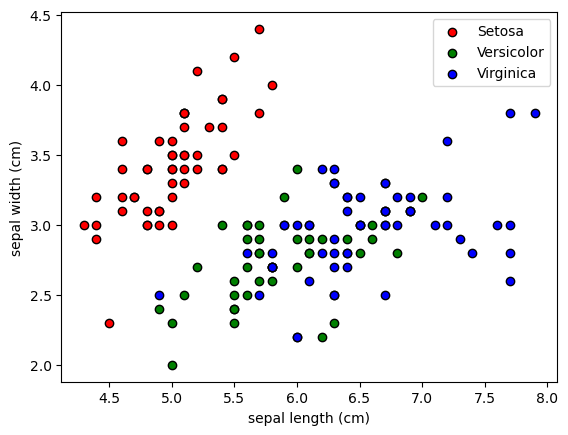

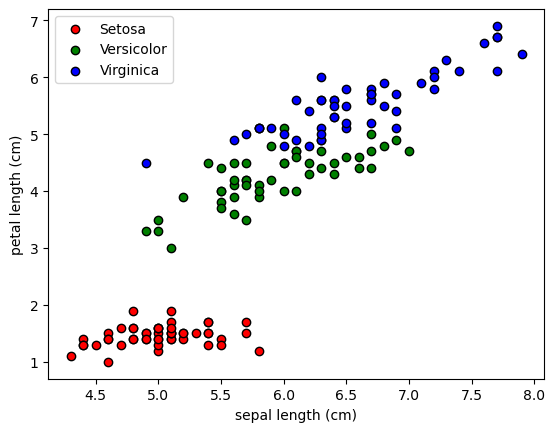

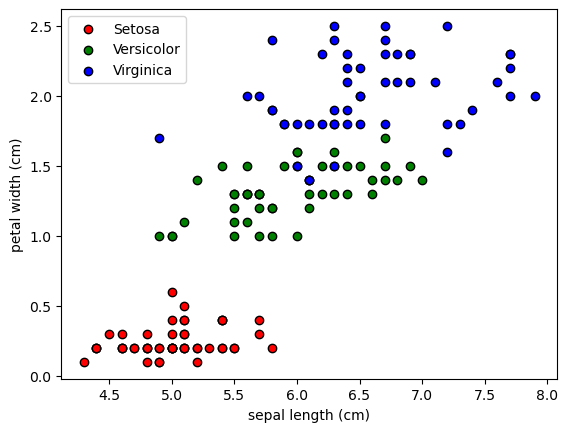

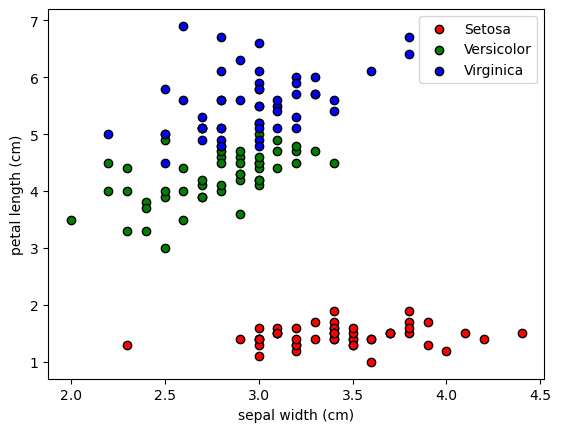

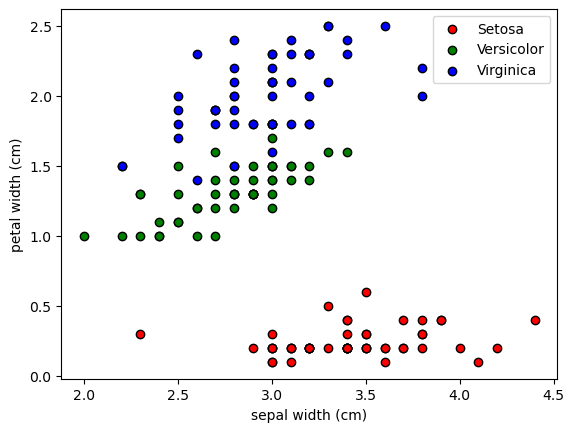

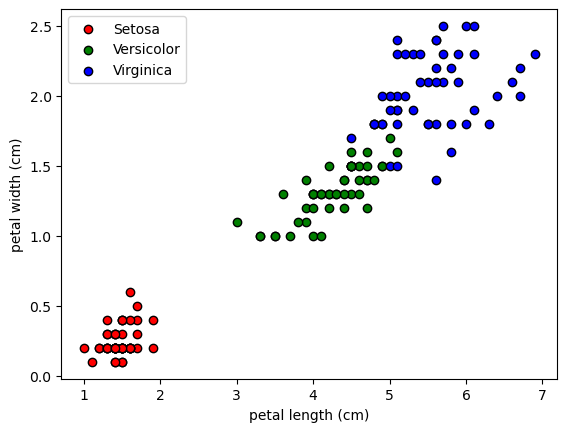

In [8]:
iris_X = iris.data
iris_y = iris.target

for i in range(4):
    for j in range(i,4):
        if i != j:
            plt.scatter(iris_X[:50, i], iris_X[:50, j], color = "r", label="Setosa", edgecolor="k")
            plt.scatter(iris_X[50:100, i], iris_X[50:100, j], color = "g", label="Versicolor", edgecolor="k")
            plt.scatter(iris_X[100:150, i], iris_X[100:150, j], color = "b", label="Virginica", edgecolor="k")
            plt.xlabel(iris.feature_names[i])
            plt.ylabel(iris.feature_names[j])
            plt.legend()
            plt.show()

<strong>b.</strong>

In [9]:
iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.3, random_state=1)
# plt.scatter(iris_x_train[:, 2], iris_x_train[:, 3], c=iris_y_train, cmap=plt.cm.Set1, edgecolor="k")

clfs = [{"clfType": Perceptron(), "name": "percepteron"},
        {"clfType": LinearDiscriminantAnalysis(), "name": "LDA"},
        {"clfType": SVC(kernel='linear', C=1e10), "name": "SVM Linear Hard"},
        {"clfType": SVC(kernel='linear', C=1.0), "name": "SVM Linear Soft"},
        {"clfType": SVC(C=1e10), "name": "SVM RBF Hard"},
        {"clfType": SVC(C=1.0), "name": "SVM RBF Soft"},
       ]
total_error = []

for clf in clfs:
    clf["clfType"].fit(iris_x_train, iris_y_train)
    
    iris_y_train_p = clf["clfType"].predict(iris_x_train)
    iris_y_test_p = clf["clfType"].predict(iris_x_test)
    
    train_c_matrix = confusion_matrix(iris_y_train, iris_y_train_p)
    test_c_matrix = confusion_matrix(iris_y_test, iris_y_test_p)
    
    print(clf["name"], " confusion matrix - train set")
    print("\n\t\tSetosa \t Versicolor \t Virginica")
    print("---------------------------------------------------")
    count = 0
    for row in train_c_matrix:
        if count == 0:
            print("Setosa\t\t",row[0],"\t",row[1],"\t\t",row[2])
        elif count == 1:
            print("Versicolor\t",row[0],"\t",row[1],"\t\t",row[2])
        else:
            print("Virginica\t",row[0],"\t",row[1],"\t\t",row[2],"\n\n")
        count += 1
    print("===================================================")
    
    print(clf["name"], " confusion matrix - test set")
    print("\n\t\tSetosa \t Versicolor \t Virginica")
    print("---------------------------------------------------")
    count = 0
    for row in test_c_matrix:
        if count == 0:
            print("Setosa\t\t",row[0],"\t",row[1],"\t\t",row[2])
        elif count == 1:
            print("Versicolor\t",row[0],"\t",row[1],"\t\t",row[2])
        else:
            print("Virginica\t",row[0],"\t",row[1],"\t\t",row[2],"\n\n")
        count += 1    
    print("===================================================")
    
    clf_error = []
    clf_error.append(np.sum(train_c_matrix) - np.trace(train_c_matrix))
    clf_error.append(np.sum(test_c_matrix) - np.trace(test_c_matrix))
    total_error.append(clf_error)

percepteron  confusion matrix - train set

		Setosa 	 Versicolor 	 Virginica
---------------------------------------------------
Setosa		 21 	 15 		 0
Versicolor	 0 	 31 		 1
Virginica	 0 	 8 		 29 


percepteron  confusion matrix - test set

		Setosa 	 Versicolor 	 Virginica
---------------------------------------------------
Setosa		 10 	 4 		 0
Versicolor	 0 	 17 		 1
Virginica	 0 	 6 		 7 


LDA  confusion matrix - train set

		Setosa 	 Versicolor 	 Virginica
---------------------------------------------------
Setosa		 36 	 0 		 0
Versicolor	 0 	 30 		 2
Virginica	 0 	 1 		 36 


LDA  confusion matrix - test set

		Setosa 	 Versicolor 	 Virginica
---------------------------------------------------
Setosa		 14 	 0 		 0
Versicolor	 0 	 18 		 0
Virginica	 0 	 0 		 13 


SVM Linear Hard  confusion matrix - train set

		Setosa 	 Versicolor 	 Virginica
---------------------------------------------------
Setosa		 36 	 0 		 0
Versicolor	 0 	 30 		 2
Virginica	 0 	 2 		 35 


SVM Linear Har

<strong>c.</strong>

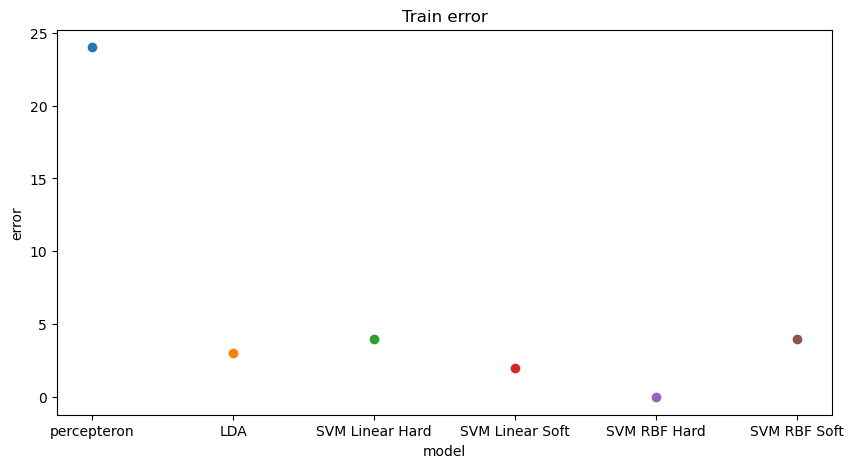

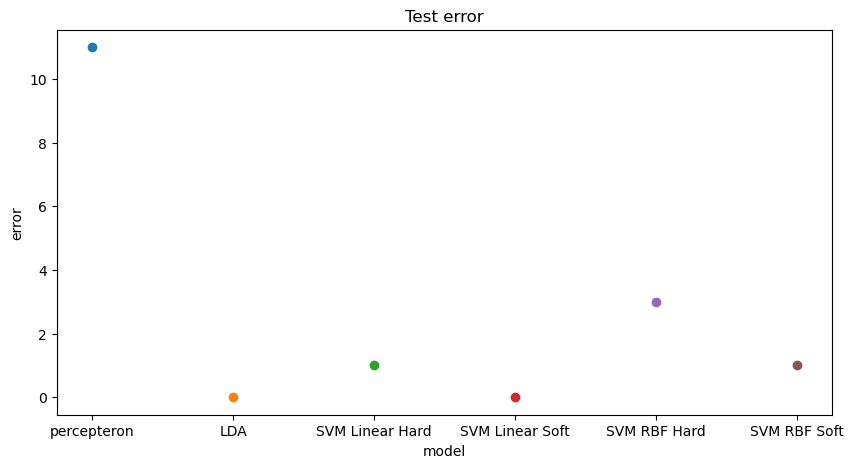

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(clfs)):
    plt.scatter(clfs[i]["name"],total_error[i][0])
plt.title("Train error")
plt.ylabel("error")
plt.xlabel("model")
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(clfs)):
    plt.scatter(clfs[i]["name"],total_error[i][1])
plt.title("Test error")
plt.ylabel("error")
plt.xlabel("model")
plt.show()

<strong>d.</strong>

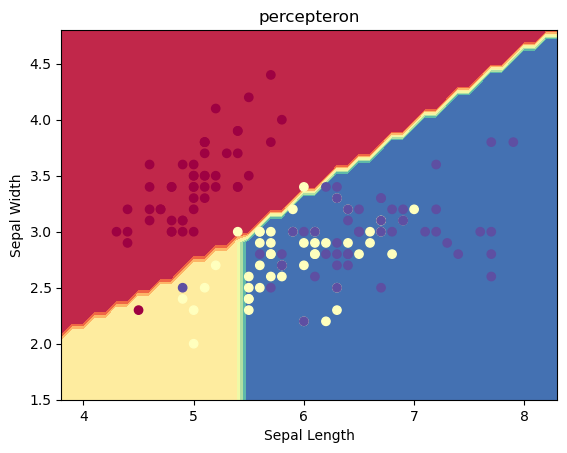

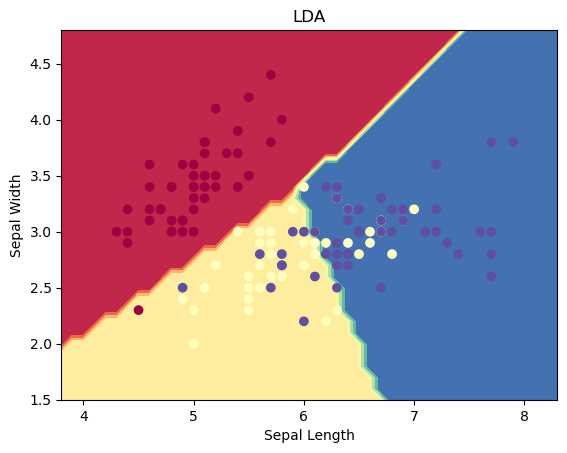

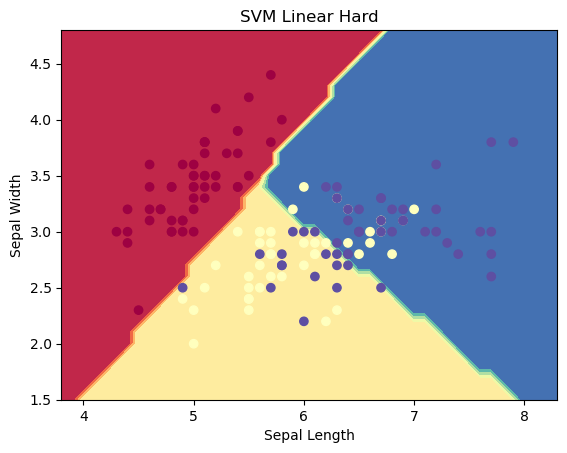

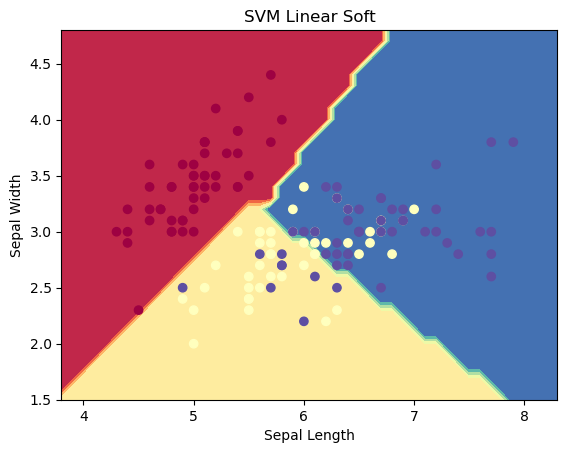

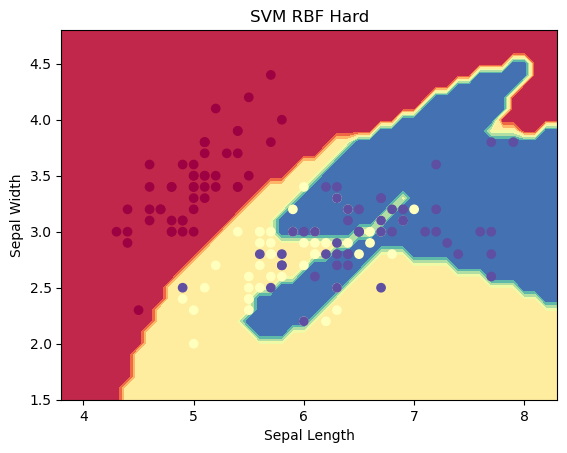

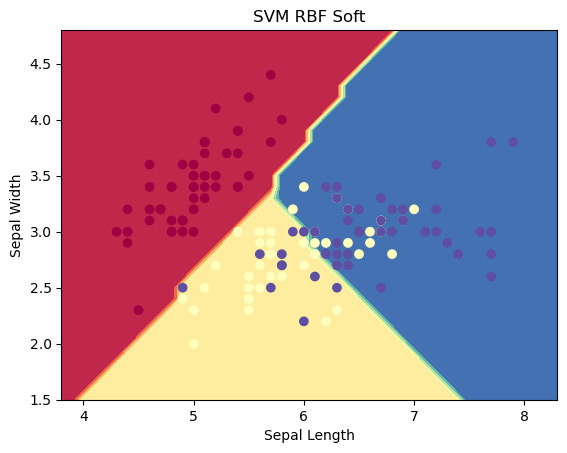

In [11]:
def plot_decision_boundary(pred_func):
    x_min, x_max = iris_X[:, 0].min() - .5, iris_X[:, 0].max() + .5
    y_min, y_max = iris_X[:, 1].min() - .5, iris_X[:, 1].max() + .5
    h = 0.1
    xx, yy= np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=plt.cm.Spectral)

for clf in clfs:
    clf["clfType"].fit(iris_x_train[:, :2], iris_y_train)
    plot_decision_boundary(lambda x: clf["clfType"].predict(x))
    plt.title(clf["name"])
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

<h2>Question 4</h2>
<p>The provided figure represents a non-linear classification problem.
<br>
<strong>a.</strong> If we are required to use a linear classification approach for this problem, what would you suggest?"<br>
<strong>b.</strong> Illustrate the concept of soft-margin in SVM classifier using a plot and discuss the impact it has on the optimization problem of SVM.
</p>
$$argmin_{w,b} \ \frac{1}{2}||w||$$

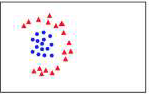

<h2>answer</h2>
<strong>a.</strong> If a linear classification approach is required for a non-linear classification problem, employing the kernel trick can be beneficial. By incorporating a kernel function within a linear classifier, such as Support Vector Machines (SVMs) with a non-linear kernel (e.g., rbf), it becomes possible to transform the data into a higher-dimensional space where linear separation becomes achievable. This enables the effective application of linear classification techniques to solve the problem. so i suggest a SVM RBF classification.<br>
<strong>b.</strong>Real-world data is often complex and cannot be perfectly separated by a hyperplane. In such cases, the strict constraint of maximizing the margin must be relaxed. This leads to the concept of a soft margin classifier, which allows for some points in the training data to fall on the wrong side of the separating line. By introducing this flexibility, the classifier can handle noisy or overlapping data more effectively, accommodating a certain degree of misclassification to achieve a more realistic and robust classification boundary.



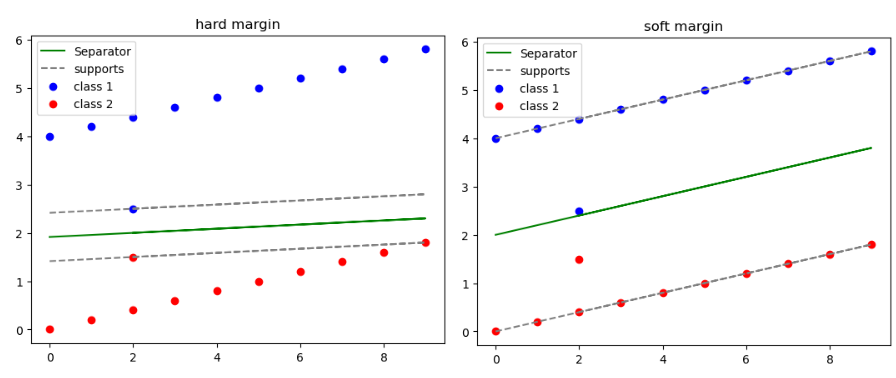

to minimize the error, we should define a loss function. A common loss function used for soft margin is the hinge loss.
$$max \{0,1 - y_{i}(w^{T}x_{i}+b)\}$$
The loss of a misclassified point is called a slack variable and is added to the primal problem that we had for hard margin SVM. So the primal problem for the soft margin becomes:
$$min \ \frac{1}{2}||w||^2 + C\sum_{i=1}^{n}\zeta_{i} \\s.t. \ \ \ \ y_{i}(w^{T}x_{i}+b) \geq 1-\zeta_{i} \ \ \ \
\forall i=1,...n \ \ \ ,\zeta_{i} \geq 0$$
A new regularization parameter C controls the trade-off between maximizing the margin and minimizing the loss.<br>
the new slack variables (ٍ$\zeta_i$) add flexibility for misclassifications of the model

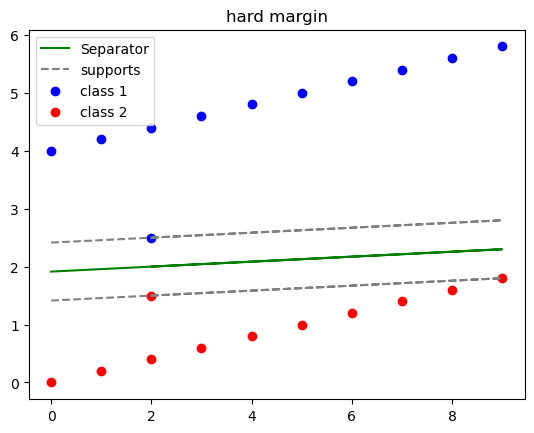

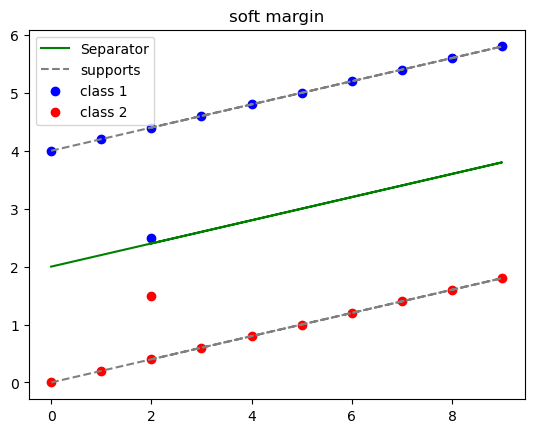

In [12]:
svm_x = np.arange(0, 10,1)
svm_x = np.append(svm_x,2)
svm_y1 = np.arange(4, 6,0.2)
svm_y1 = np.append(svm_y1,2.5)
svm_y2 = np.arange(0, 2,0.2)
svm_y2 = np.append(svm_y2,1.5)
X = []
y = []

for i in range(len(svm_x)):
    X.append([svm_x[i],svm_y1[i]])
    X.append([svm_x[i],svm_y2[i]])
    y.append(1)
    y.append(-1)


clf = SVC(kernel='linear', C=1e10).fit(X, y)

decision_function = clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = []
for s in support_vector_indices:
    support_vectors.append(X[s])

separator = (-clf.coef_[0][0] * svm_x - clf.intercept_[0]) / clf.coef_[0][1]
support1 = (-clf.coef_[0][0] * svm_x - clf.intercept_[0] + 1) / clf.coef_[0][1]
support2 = (-clf.coef_[0][0] * svm_x - clf.intercept_[0] - 1) / clf.coef_[0][1]

plt.plot(svm_x, separator, color='green', label='Separator')
plt.plot(svm_x, support1, color='grey', label='supports', ls='--')
plt.plot(svm_x, support2, color='grey', ls='--')
plt.scatter(svm_x,svm_y1,color='blue', label='class 1')
plt.scatter(svm_x,svm_y2,color='r', label='class 2')
plt.title('hard margin')
plt.legend()
plt.show()

clf = SVC(kernel='linear', C=0.1).fit(X, y)

decision_function = clf.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = []
for s in support_vector_indices:
    support_vectors.append(X[s])

separator = (-clf.coef_[0][0] * svm_x - clf.intercept_[0]) / clf.coef_[0][1]
support1 = (-clf.coef_[0][0] * svm_x - clf.intercept_[0] + 1) / clf.coef_[0][1]
support2 = (-clf.coef_[0][0] * svm_x - clf.intercept_[0] - 1) / clf.coef_[0][1]

plt.plot(svm_x, separator, color='green', label='Separator')
plt.plot(svm_x, support1, color='grey', label='supports', ls='--')
plt.plot(svm_x, support2, color='grey', ls='--')
plt.scatter(svm_x,svm_y1,color='blue', label='class 1')
plt.scatter(svm_x,svm_y2,color='r', label='class 2')
plt.title('soft margin')
plt.legend()
plt.show()
